# Mathematical Pendulum

### Import libraries

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Data

In [120]:
# length in cm
length_cm =np.array([12.1, 20.9, 25.8, 35.3, 43.5, 48.6, 52.2, 64.1, 68.7, 89.3])+0.75
# time for N periods in s
time = np.array([14.35, 18.69, 20.74, 12.05, 13.29, 14.09, 14.7, 16.13, 16.65, 18.97])
# periods
N_periods = np.array([20, 20, 20, 10, 10, 10, 10, 10, 10, 10])

### Calculate values in basic units and per period

In [121]:
period = time/N_periods
length = length_cm / 100

### Plot Data

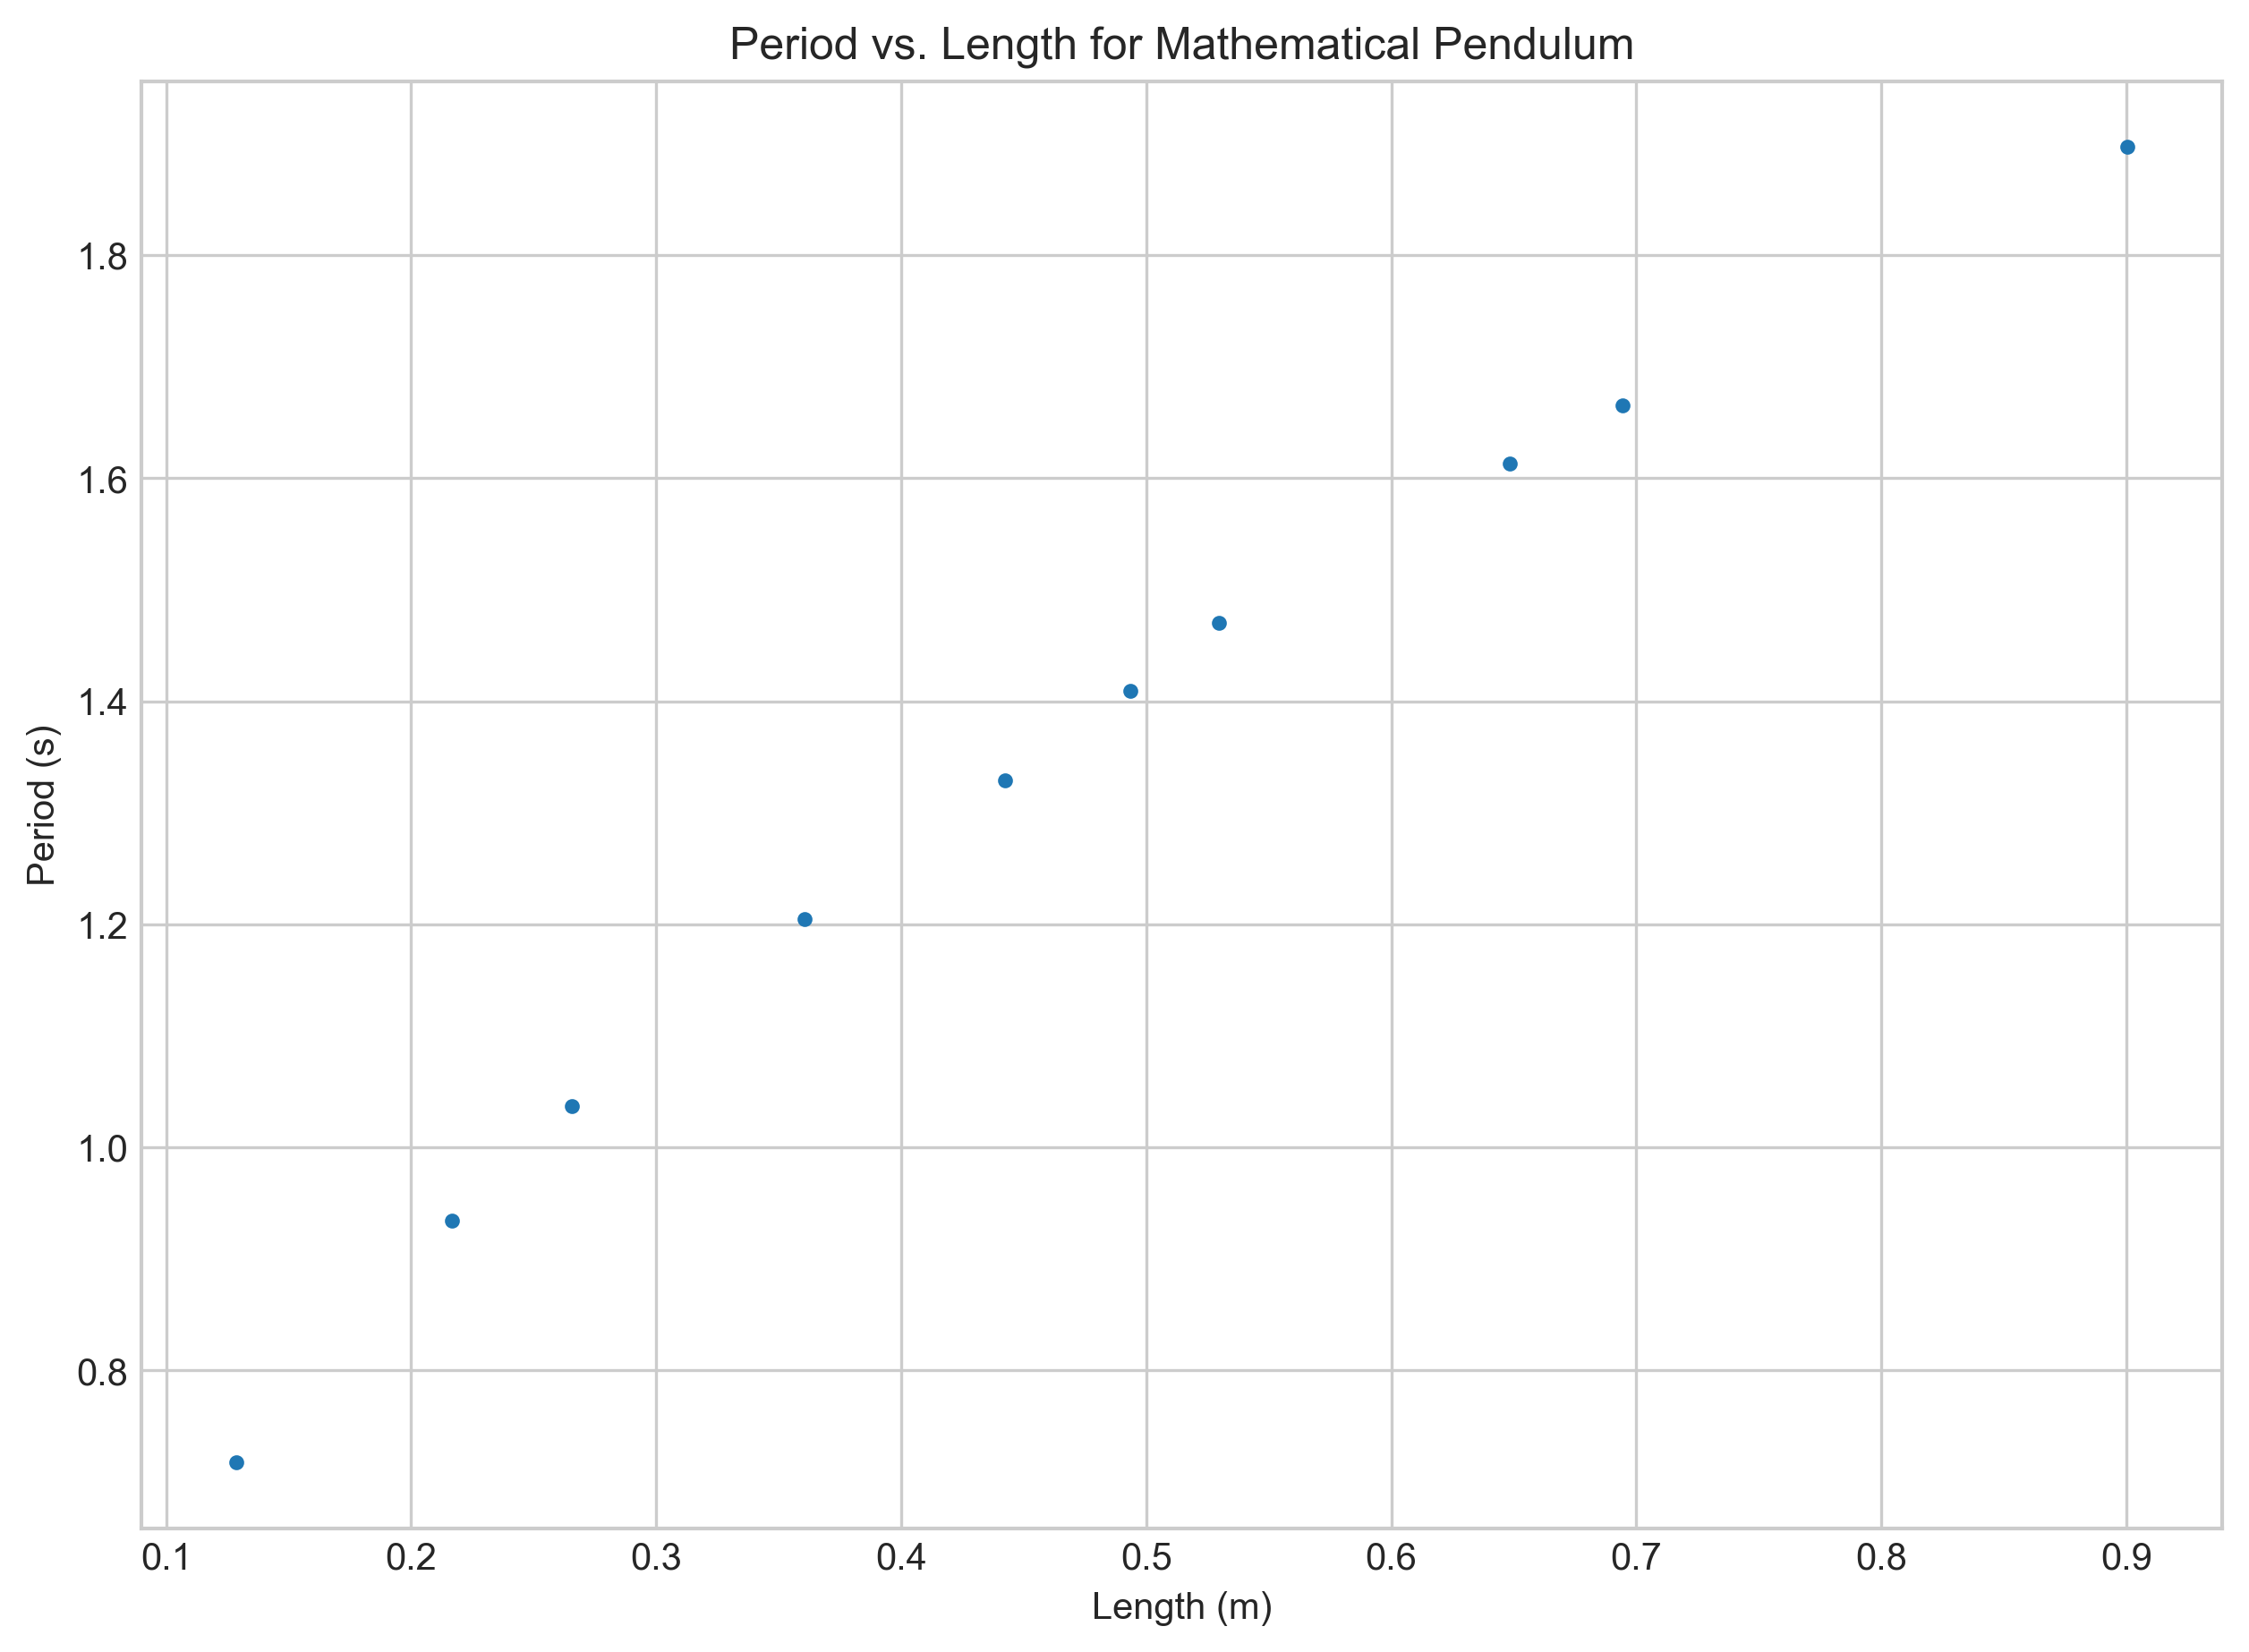

In [122]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,7), dpi=300)
plt.title('Period vs. Length for Mathematical Pendulum')
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

plt.plot(length, period, ".")

### Errors

In [123]:
# time error per measurement in s
dt = 0.1
# length error in m
dl = 0.005
dT= dt/N_periods

### Plot graph with error bars

<ErrorbarContainer object of 3 artists>

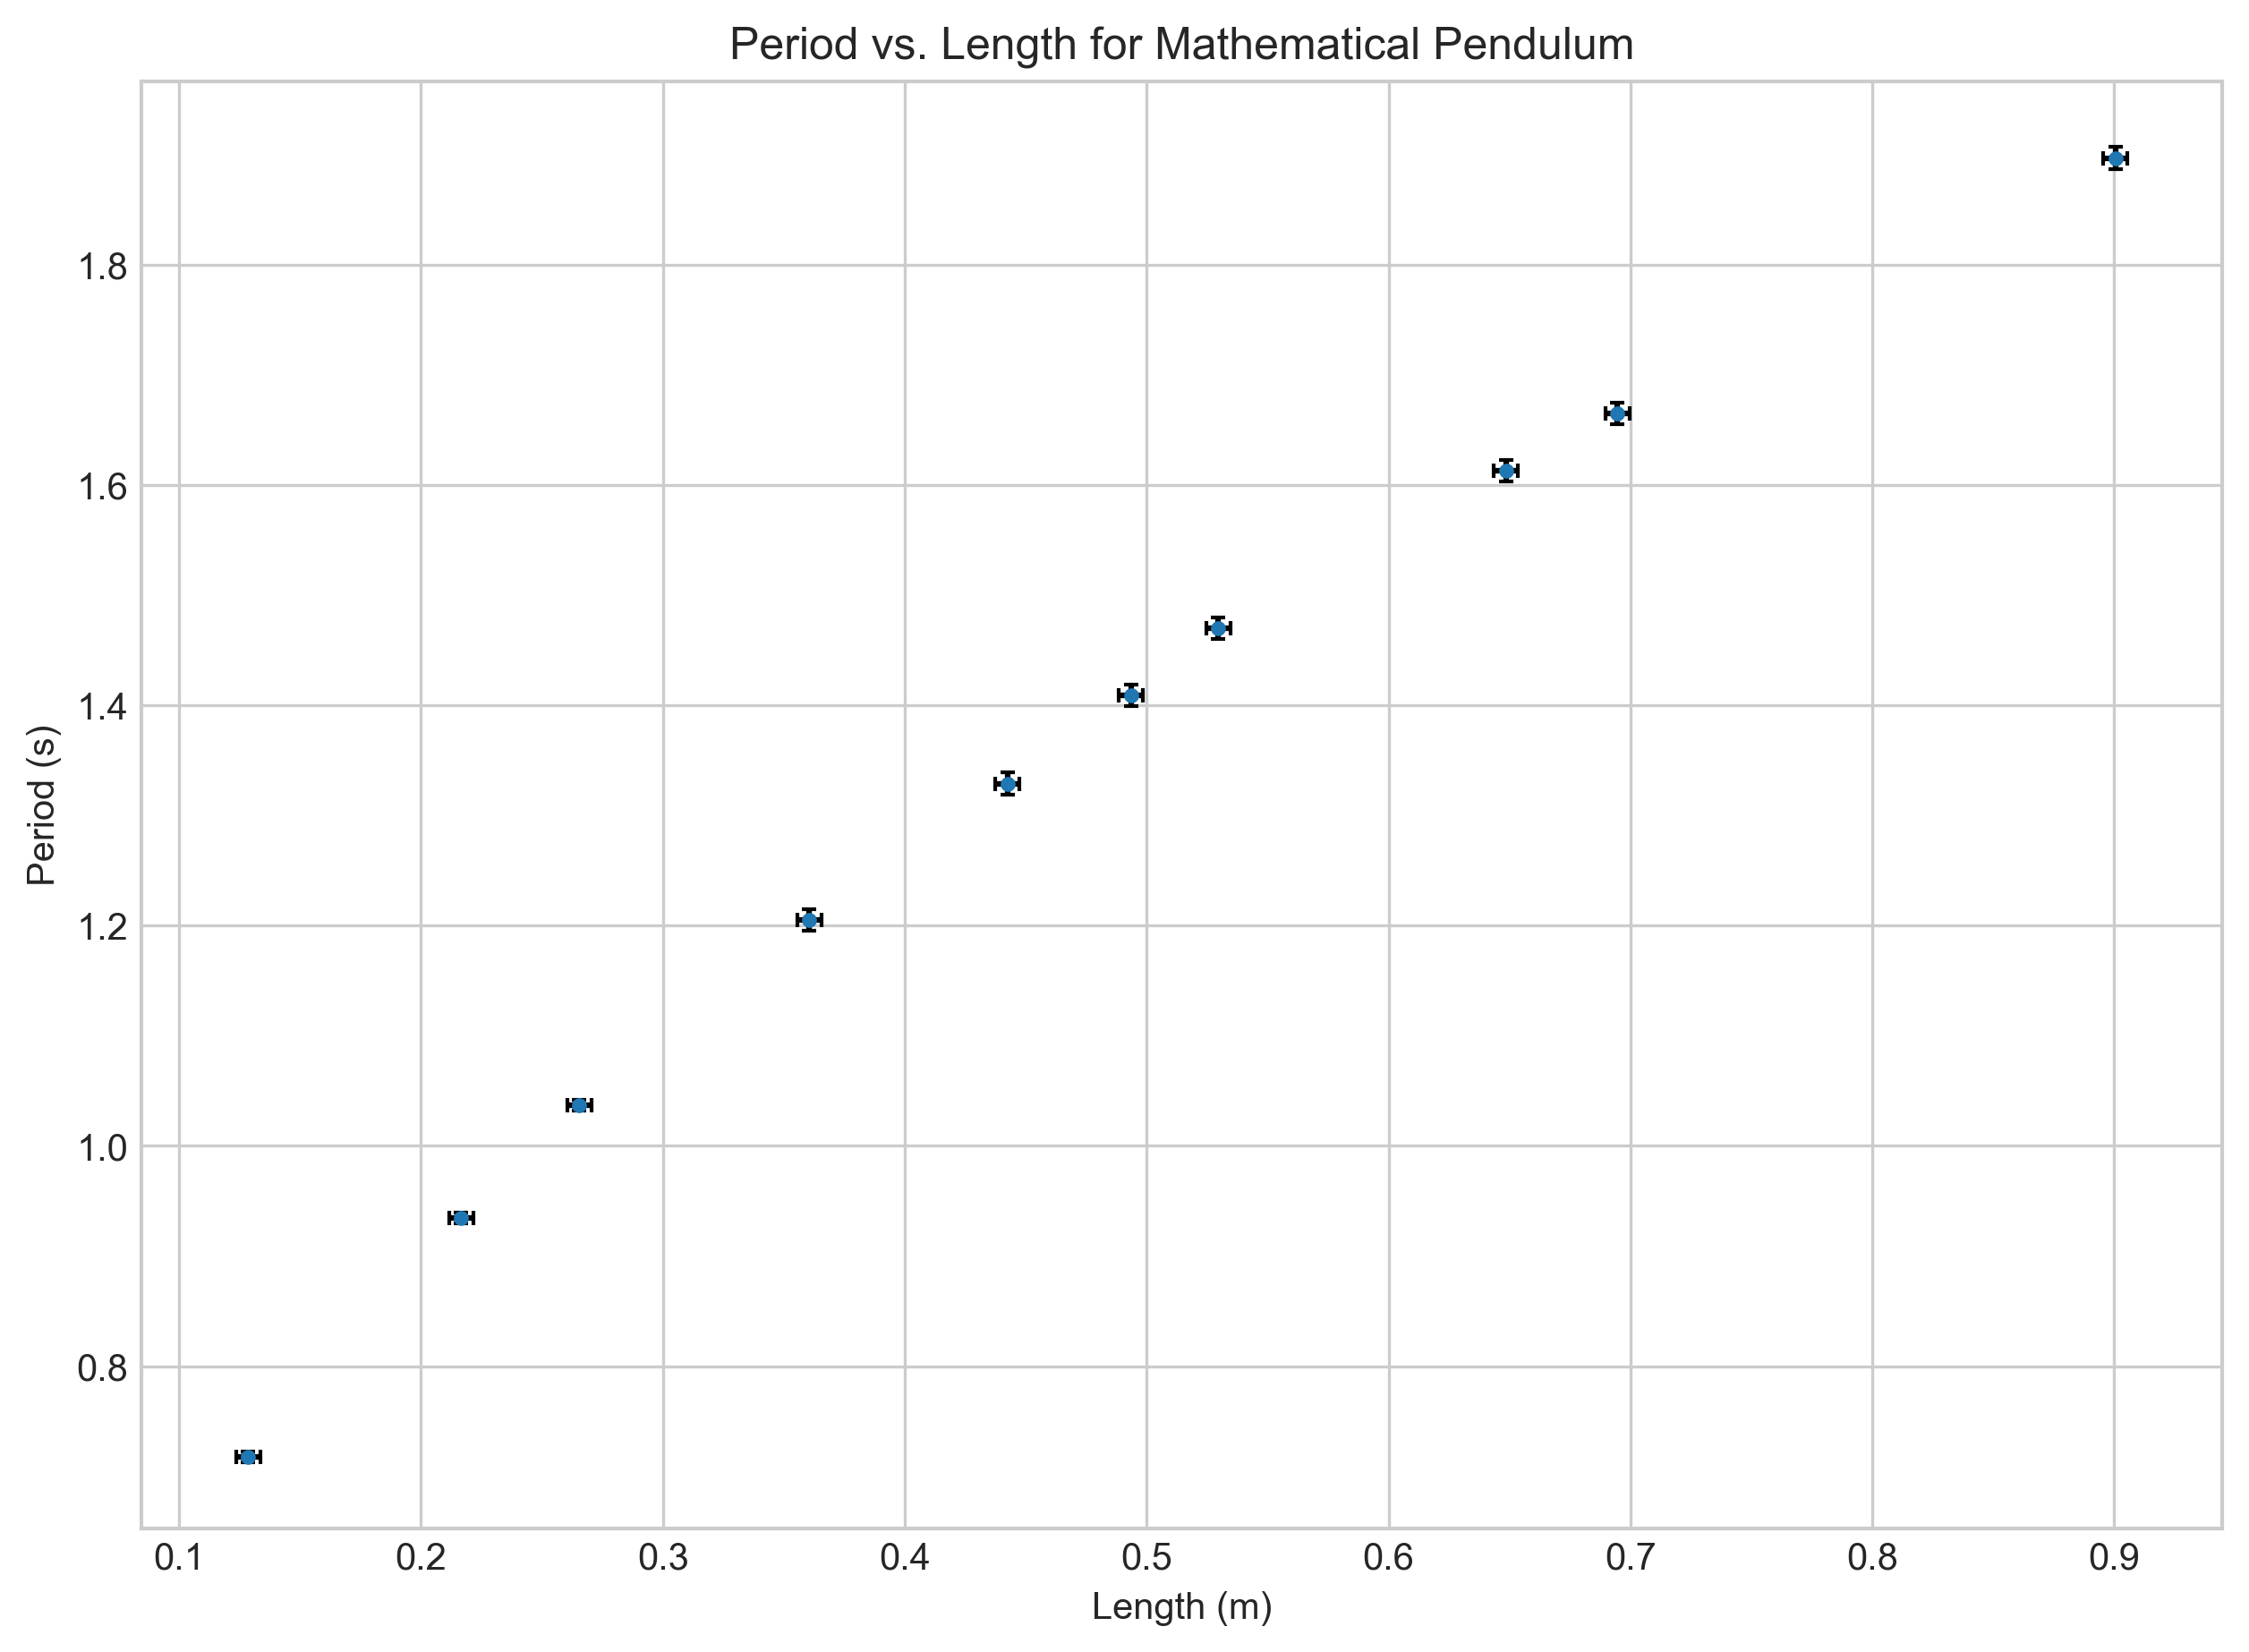

In [124]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,7), dpi=300)
plt.title('Period vs. Length for Mathematical Pendulum')
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

plt.errorbar(length, period, yerr=dT, xerr=dl, fmt='.', ecolor='black', capsize=2)

### Define Fit Function

In [125]:
def f(x, a):
    return a * np.sqrt(x)

a_optimal, cov = curve_fit(f, length, period)

### Calculate Fit Parameters and Plot Best Fit

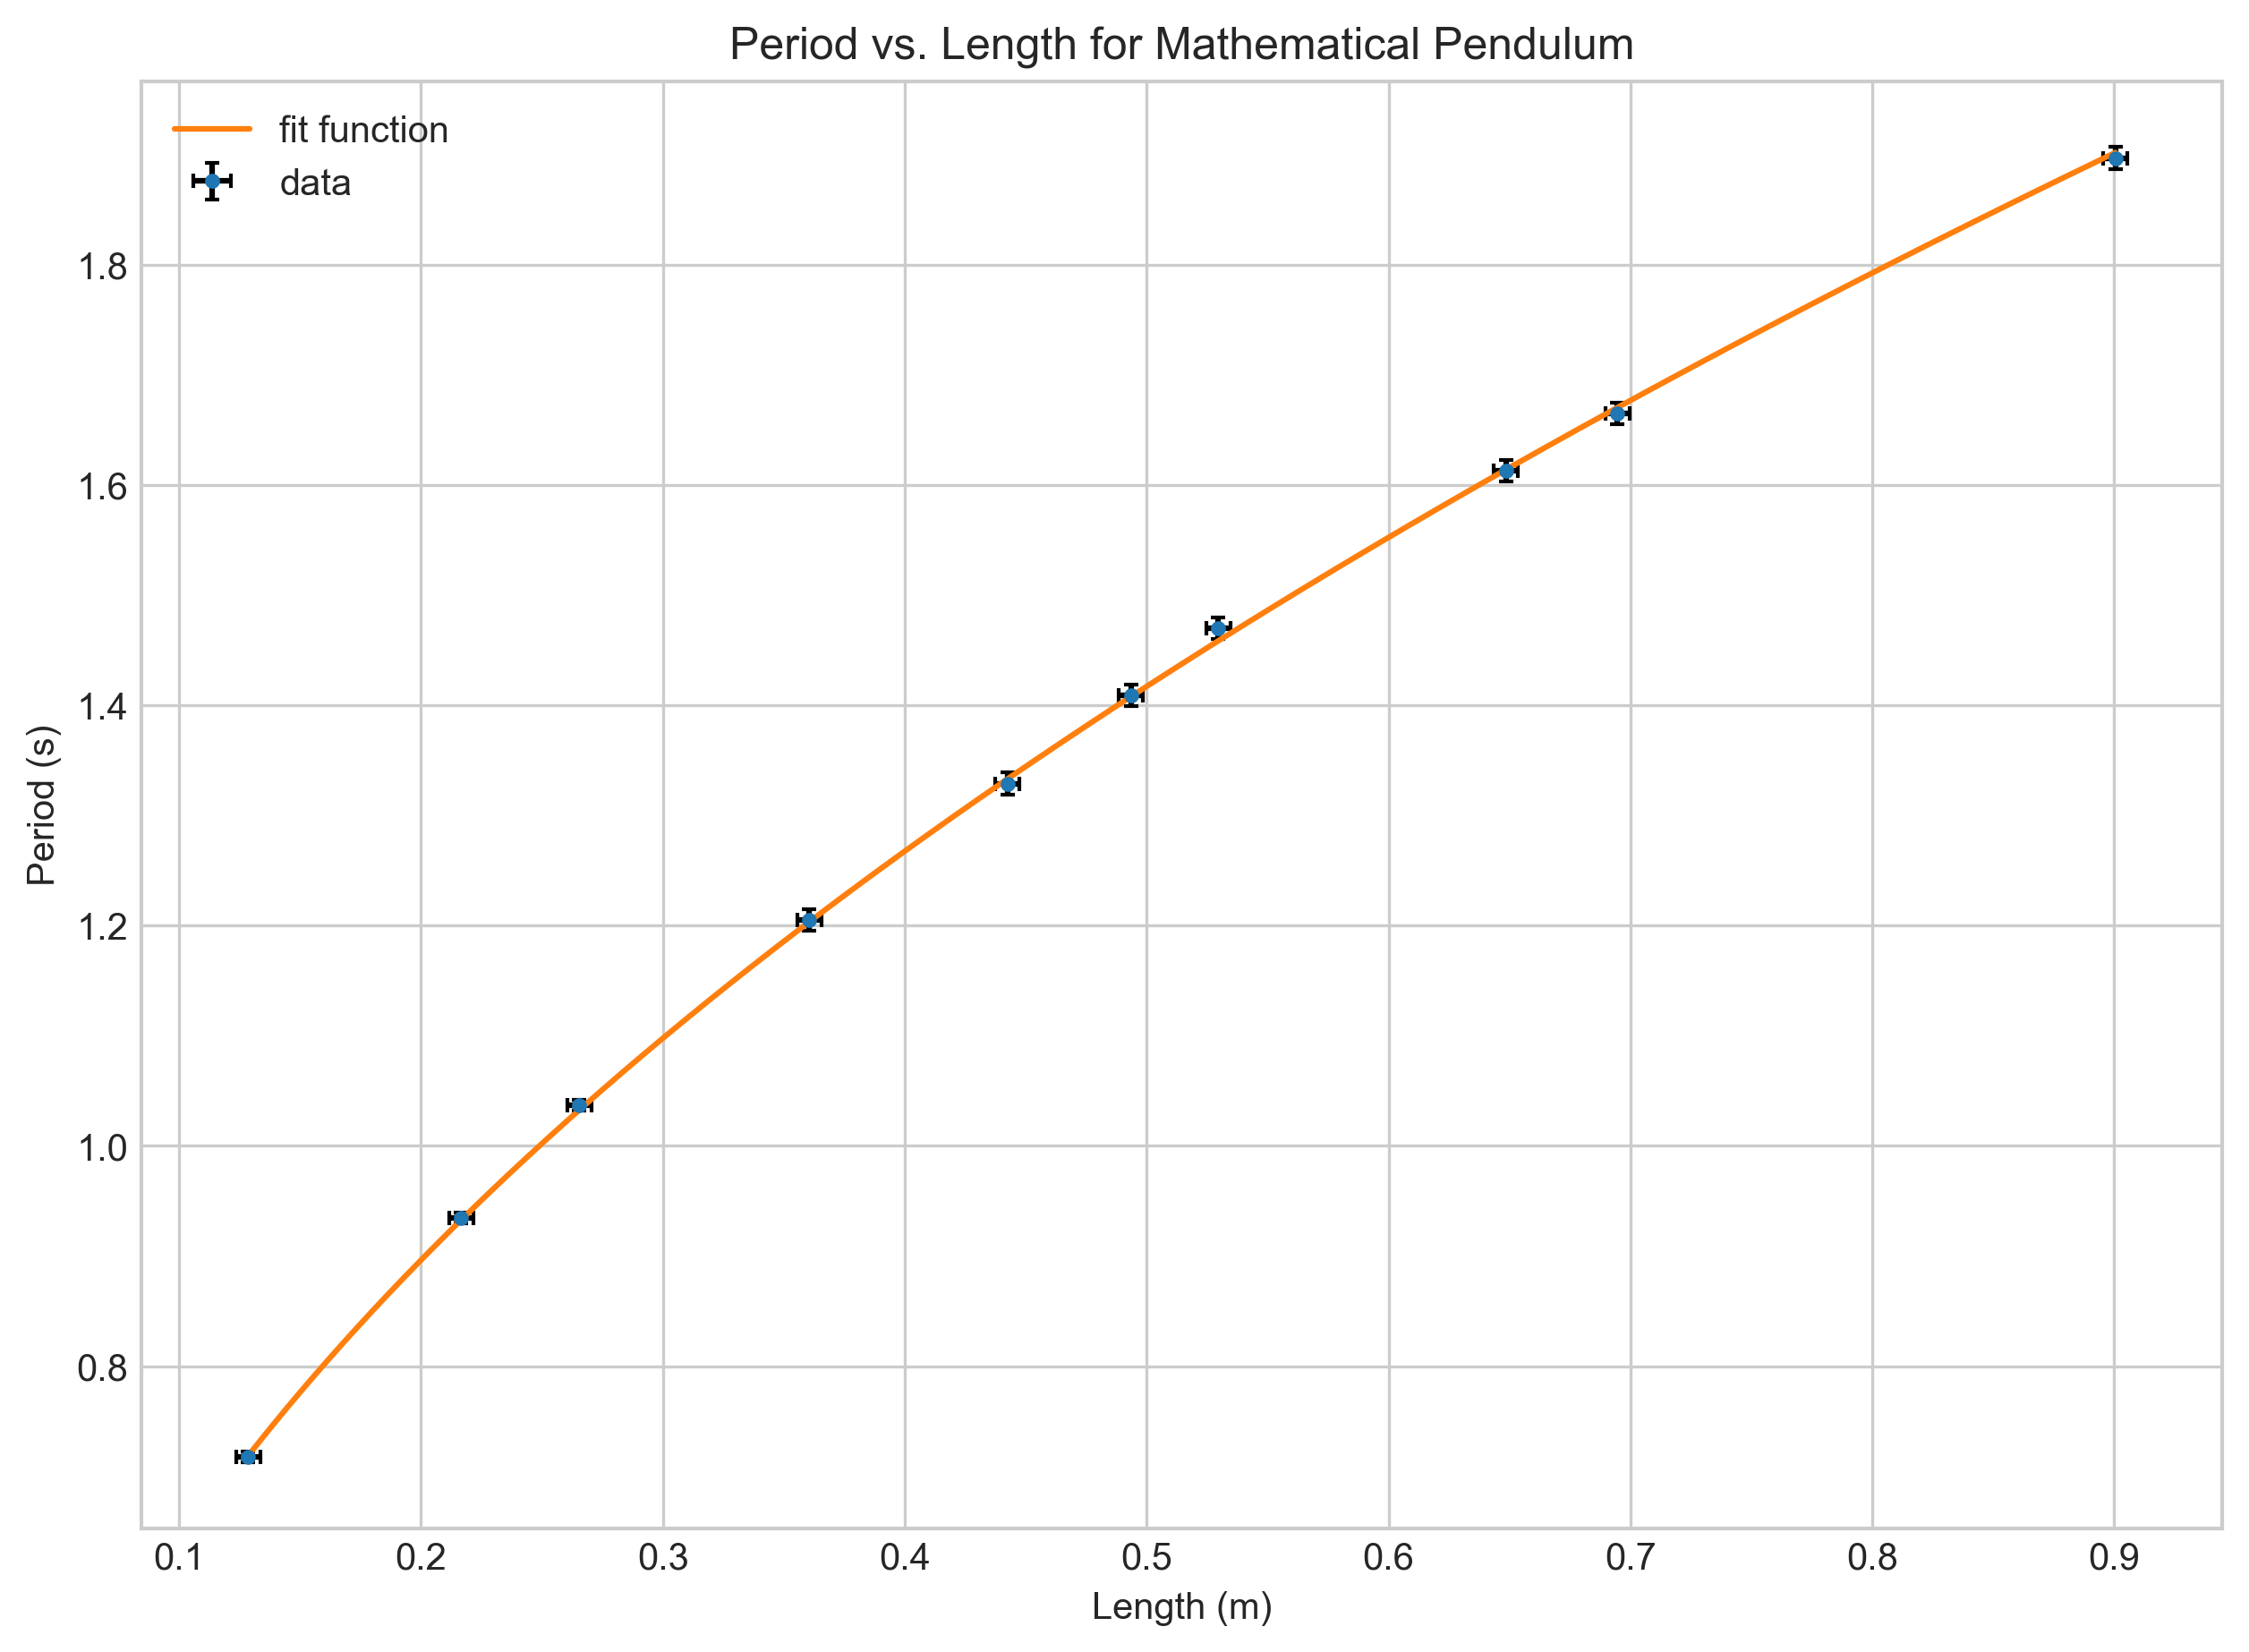

In [126]:
x = np.linspace(min(length), max(length), 1000)
y = f(x, a_optimal)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,7), dpi=300)
plt.title('Period vs. Length for Mathematical Pendulum')
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

plt.errorbar(length, period, yerr=dT, xerr=dl, fmt='.', ecolor='black', capsize=2, label='data')
plt.plot(x, y, label='fit function')
plt.legend()

### Calculate Residuals and Show Residual Plot

<ErrorbarContainer object of 3 artists>

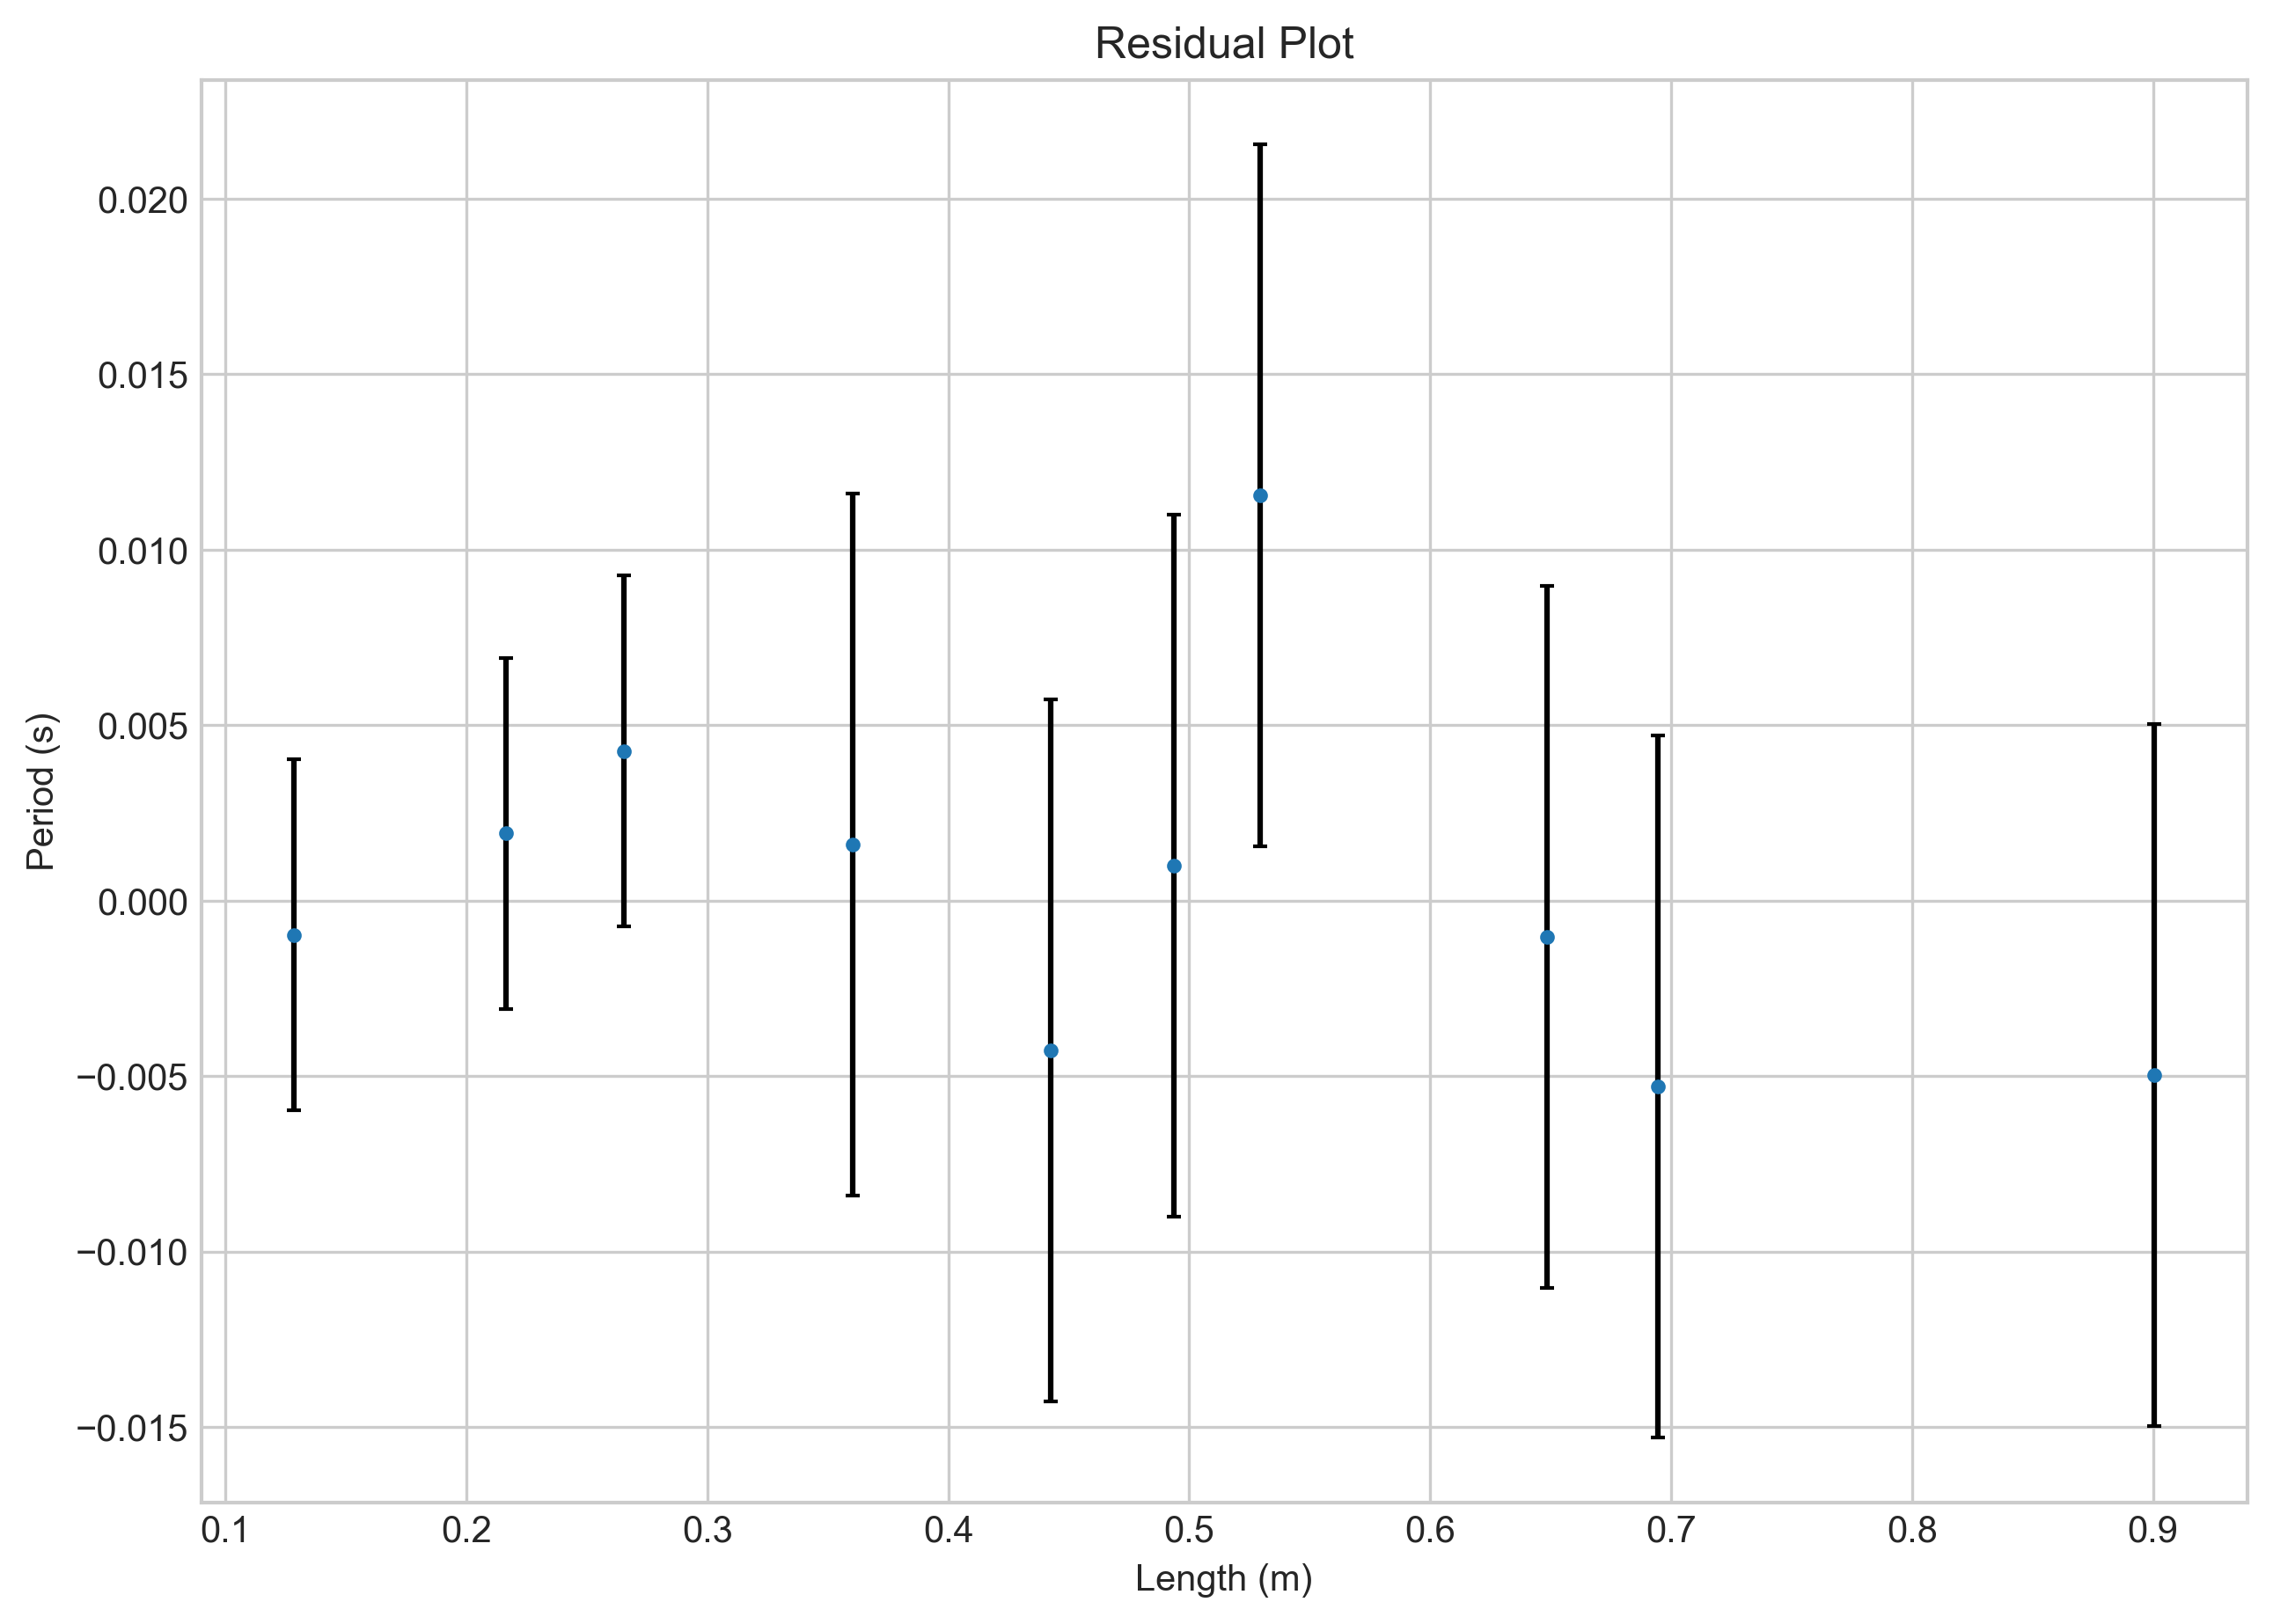

In [127]:
res = period - f(length, a_optimal)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,7), dpi=300)
plt.title('Residual Plot')
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

plt.errorbar(length, res, yerr=dT, fmt='.', ecolor='black', capsize=2, label='data')

### Calculate Gravitational Acceleration

In [147]:
4 * np.pi**2 / a_optimal**2

array([9.82745768])

In [144]:
g = 4 * np.pi**2 * length / period**2
N = len(g)

gmax = 4 * np.pi**2 * (length + dl) / (period - dT)**2
dg = (gmax - g).mean()/np.sqrt(N)


print(f'g = ({g.mean():.5f} ± {dg:.5f}) m/s2 = ({g.mean():.2f} ± {dg:.2f}) m/s2')

g = (9.81767 ± 0.08627) m/s2 = (9.82 ± 0.09) m/s2
